# 目标检测

In [1]:
%matplotlib inline
import torch
from d2l import torch as d2l

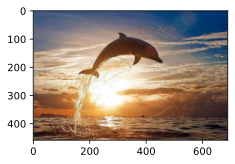

In [4]:
# 设置窗口大小，显示图像
d2l.set_figsize()
img = d2l.plt.imread('../picture.jpg')
d2l.plt.imshow(img)

In [3]:
# 两种目标检测方法的相互转化
# 将boxes的四个坐标记录下来，计算中心坐标和宽高度值，更新boxes参数
def box_corner_to_center(boxes):
    """从（左上，右下）转换到（中间，宽度，高度）"""
    x1, y1, x2, y2 = boxes[:, 0], boxes[:, 1], boxes[:, 2], boxes[:, 3]
    cx = (x1 + x2) / 2
    cy = (y1 + y2) / 2
    w = x2 - x1
    h = y2 - y1
    boxes = torch.stack((cx, cy, w, h), axis=-1)
    return boxes
#@save
def box_center_to_corner(boxes):
    """从（中间，宽度，高度）转换到（左上，右下）"""
    cx, cy, w, h = boxes[:, 0], boxes[:, 1], boxes[:, 2], boxes[:, 3]
    x1 = cx - 0.5 * w
    y1 = cy - 0.5 * h
    x2 = cx + 0.5 * w
    y2 = cy + 0.5 * h
    boxes = torch.stack((x1, y1, x2, y2), axis=-1)
    return boxes

In [9]:
# bbox是边界框的英文缩写，图像的原点为左上角
th_bbox = [180.0, 100.0, 500.0, 250.0]

In [10]:
# 检测边界框的正确性
boxes = torch.tensor(th_bbox)
box_center_to_corner(box_corner_to_center(boxes)) == boxes

IndexError: too many indices for tensor of dimension 1

In [ ]:
# 将边界框绘制出来，matplotlib形式的矩阵表示，左上角，宽度高度
def bbox_to_rect(bbox, color):
    # 将边界框(左上x,左上y,右下x,右下y)格式转换成matplotlib格式：
    # ((左上x,左上y),宽,高)
    return d2l.plt.Rectangle(
        xy=(bbox[0], bbox[1]), width=bbox[2]-bbox[0], height=bbox[3]-bbox[1],
        fill=False, edgecolor=color, linewidth=2)

In [ ]:
# 绘制出边界框
fig = d2l.plt.imshow(img)
fig.axes.add_patch(bbox_to_rect(dog_bbox, 'blue'))
fig.axes.add_patch(bbox_to_rect(cat_bbox, 'red'));